<a href="https://colab.research.google.com/github/linhkid/gdg-codelab-25/blob/main/multiagent/GDG_Gemma2_0_multiagent_funccall_vertex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codelab: Build your first agentic AI with Gemma 2.0 and Vertex AI

Welcome to this **Codelab**, where you'll learn how to build your **first agentic AI** using **Gemma 2.0** and **Vertex AI**.  

In this hands-on guide, you'll explore:  
✅ The fundamentals of **agentic AI**  
✅ How **Gemma 2.0** enhances AI capabilities  
✅ Using **Vertex AI** for seamless model integration  
✅ Step-by-step implementation to build your AI  

By the end, you'll have a working AI agent and a solid understanding of the core concepts.
Let's dive in! 🔥  

# What is Gemma ?

(Note: Below image is from Gemma 1. Gemma 2 has Grouped Query Attention instead of MHA)

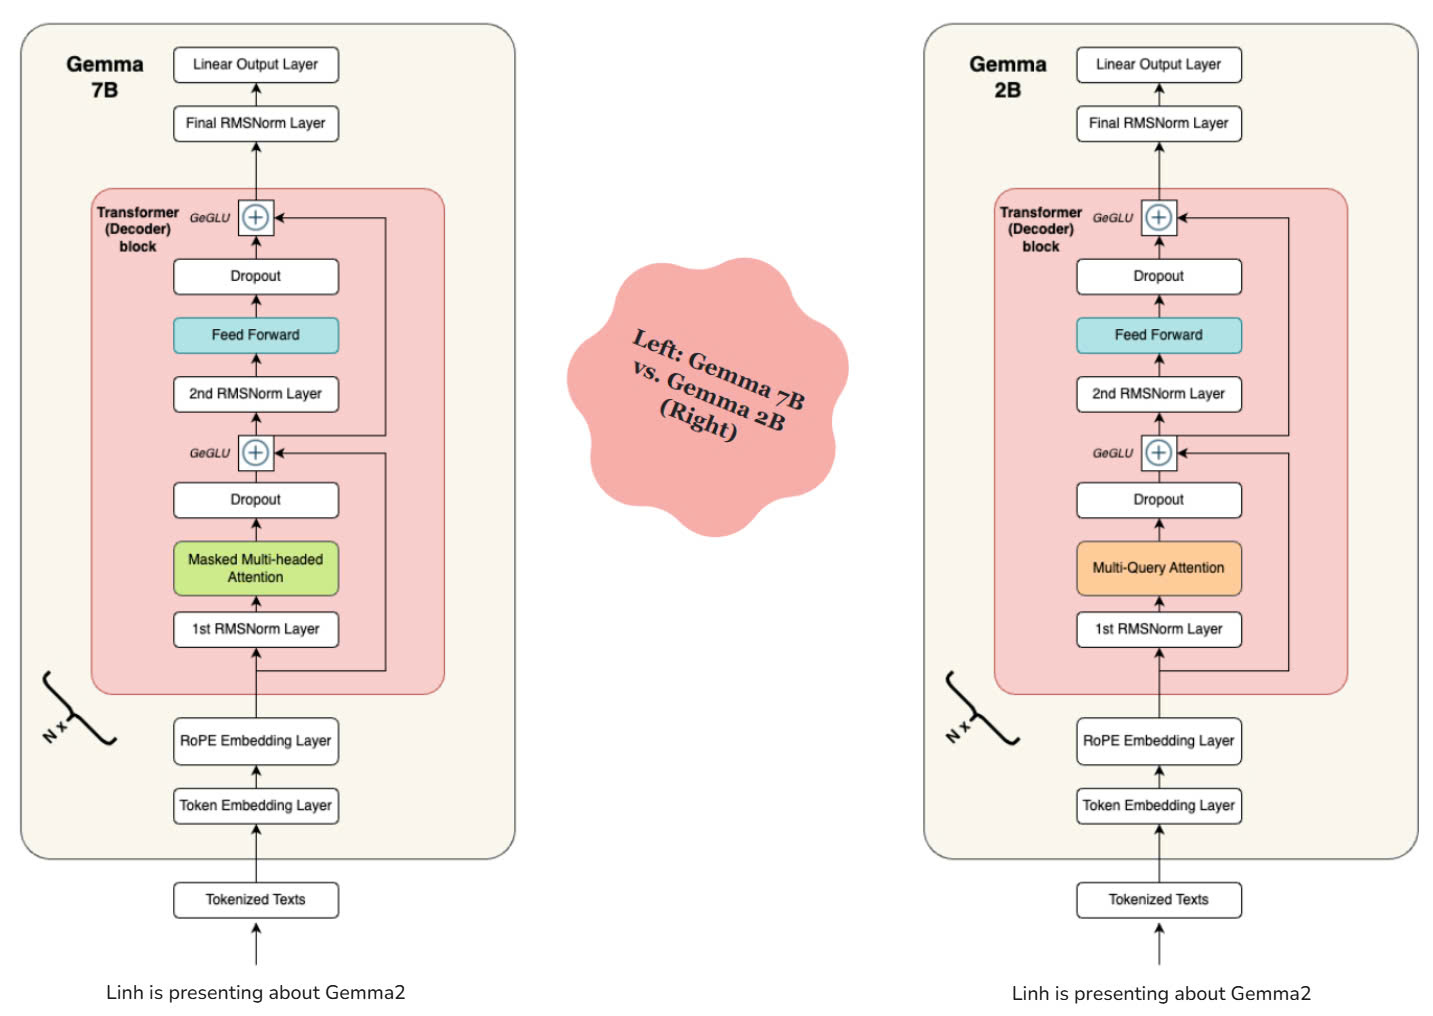

## Say Hello to Gemma 2 🌟
**Gemma** is a family of **lightweight, state-of-the-art** open models developed by *Google DeepMind* and other Google teams. Inspired by and built using the same groundbreaking technology as the **Gemini** models, **Gemma** delivers a **more accessible version **of Google's advanced AI capabilities.

## Meet Gemma 2  

Welcome to **Gemma 2**, Google's **next-gen lineup** of open models! 🎉  

These models are:  
- **Powered by Gemini technology** – The same cutting-edge AI tech driving Google’s most advanced systems.  
- **Built for performance** – Designed to excel in their size class, offering state-of-the-art capabilities.  
- **Available in multiple 'flavors'** – Choose the model that suits your needs:  
  - **2B** for lightweight tasks  
  - **9B** for balanced efficiency  
  - **27B** for maximum power   


![](https://github.com/linhkid/gdg-codelab-25/blob/main/img/gemma2improvement.png?raw=1)



## Why Gemma 2 Stands Out  

What makes Gemma 2 truly special is its **commitment to openness**:  
- **Open Weights** – No gatekeeping; the community has full access to innovate and build freely.  
- **Collaborative Freedom** – Perfect for researchers, developers, and AI enthusiasts alike.  
- **Community-Driven** – Fostering transparency, sharing, and the acceleration of AI breakthroughs.  

---

Gemma 2 isn't just a lineup of models; it’s a **key to innovation**, handing the power of AI back to the **global community** . Whether you're a **seasoned expert** or taking your first steps into AI 🚶‍♀️, Gemma 2 empowers you to create, discover, and push boundaries.  

Ready to unlock the possibilities? Let’s dive in! 🎉🚀💡

# Multi-agent System

![](img/multiagentarch.png) 

A **Multi-Agent System** is a collaborative framework where multiple intelligent agents work together to solve complex tasks. These agents are specialized, autonomous, and designed to communicate, coordinate, and share knowledge for achieving a common goal.  

---

## Advantages of Multi-Agent Systems  

Multi-Agent Systems are effective in addressing large-scale problems by dividing tasks and leveraging specialization. Their key advantages include:  

- **Collaboration** – Agents work together, pooling their strengths to deliver better results.  
- **Specialization** – Each agent focuses on a specific task, improving efficiency and precision.  
- **Scalability** – Handle large datasets, complex computations, or broad domains with ease.  
- **Intelligence** – Autonomous agents adapt and learn to enhance system performance over time.  

---

## Key Features of Multi-Agent Systems  

**Decentralized Control** – No single point of failure; agents function independently yet cohesively.  
**Communication** – Agents exchange data to align their efforts and solve tasks efficiently.  
**Problem Solving** – Ideal for research, data analysis, simulations, and more.  
**Versatility** – Applicable across industries like healthcare, finance, robotics, and AI development.  

---

## Applications of Multi-Agent Systems  

**Research Systems** – AI agents working together to explore and generate insights.  
**Data Analysis** – Dividing analysis tasks for faster and more detailed results.  
**Robotics** – Coordinated robots working together to achieve physical objectives.  
**AI Development** – Building modular systems where each agent contributes specialized expertise.  

---

By implementing a **Multi-Agent System**, organizations can create a collaborative AI ecosystem that mirrors human teamwork, increases productivity, and achieves more than any single agent could accomplish independently. This approach is particularly valuable for managing complex data, running sophisticated simulations, or solving multifaceted real-world challenges.


# Step 1: Setup and Authentication

In [ ]:
# Install dependencies and authenticate with Vertex AI

# @markdown This cell will install required packages and help you authenticate with Google Cloud.

# !pip install -q -U google-cloud-aiplatform
# !pip install -q matplotlib pandas numpy

from google.colab import auth
import os
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap
from IPython.display import display, HTML, Markdown

# Authenticate to Google Cloud
auth.authenticate_user()

print("✅ Required packages installed. Authenticating with Vertex AI...\n")

✅ Required packages installed. Authenticating with Vertex AI...



In [ ]:
# #MODEL_NAME = "projects/991182027087/locations/asia-southeast1/endpoints/2979144347645116416"
# MODEL_NAME = "projects/991182027087/locations/asia-southeast1/endpoints/145254282122231808"

# Step 2: Initialize Vertex AI for Gemma 2.0

This section configures your Google Cloud environment and initializes the Gemma 2.0 model via Vertex AI for generative text capabilities.

1. **Google Cloud Project**  
   You need a Google Cloud Project with Vertex AI API enabled.

2. **Vertex AI Access**  
   Ensure you have appropriate permissions to access Vertex AI services.

3. **Gemma 2.0 Endpoint**  
   The code uses a specific Vertex AI endpoint for Gemma 2.0. Verify this endpoint exists in your project.

4. **Model Endpoint ID**
  It will follow this format: "projects/{project_id}/locations/{location}/endpoints/{endpoint_id}"  


### Configuration Steps

The code performs the following setup:

1. **Initialize Vertex AI client**  
   Connects to your Google Cloud project using the provided project ID and region.

2. **Access Gemma 2.0 model**  
   Loads the instruction-tuned Gemma 2.0 model from your Vertex AI endpoint.

3. **Create helper functions**  
   - `generate_response`: Sends prompts to the model and processes responses
   - `display_markdown`: Renders model outputs as formatted Markdown

### Important Notes

- If you don't provide a project ID, the code will attempt to retrieve it from environment variables.
- The default region is set to `asia-southeast1` - adjust if your resources are in a different region.
- The code includes error handling to provide feedback if initialization fails.
- Response generation can be customized with temperature, token limits, and other parameters.

---

Once this setup completes successfully, you'll be able to use Gemma 2.0 capabilities throughout the rest of the notebook.

In [ ]:
# Initialize Vertex AI and Gemma 2.0
# @markdown Configure your project and set up Gemma 2.0 via Vertex AI

import vertexai
from vertexai.generative_models import GenerationConfig, GenerativeModel

# Set your project ID
PROJECT_ID = "gdg-codelab-12thMay "  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    try:
        # Try to retrieve project ID from environment variable
        PROJECT_ID = os.environ.get("GOOGLE_CLOUD_PROJECT")
        print(f"Using project ID from environment: {PROJECT_ID}")
    except:
        print("❌ Please set your Google Cloud project ID")

# Set location
LOCATION = "asia-southeast1"  # Vertex AI region

# Initialize Vertex AI
vertexai.init(project=PROJECT_ID, location=LOCATION)

# Gemma 2.0 model setup
MODEL_NAME = "projects/991182027087/locations/asia-southeast1/endpoints/6194151531634229248"  # Instruction-tuned Gemma 2.0 model

try:
    # Load the Gemma 2.0 model from Vertex AI
    model = GenerativeModel(MODEL_NAME)
    print(f"✅ Successfully initialized {MODEL_NAME} on Vertex AI")
except Exception as e:
    print(f"❌ Error initializing model: {e}")
    print("Please check your project configuration and model availability in Vertex AI")

# Helper function for generating responses

def generate_response(prompt, temperature=0.2, max_output_tokens=1024, top_p=0.8):
    """Generate a response from Gemma 2.0 on Vertex AI"""
    request_json = {
        "instances": [
            {
                "inputs": prompt
            }
        ]
    }
    try:
        generation_config = GenerationConfig(
            temperature=temperature,
            max_output_tokens=max_output_tokens,
            top_p=top_p
        )

        response = model.generate_content(
            json.dumps(request_json),
            generation_config=generation_config
        )

        return response.text
    except Exception as e:
        print(f"Error generating response: {e}")
        return "Error generating response."


✅ Successfully initialized projects/991182027087/locations/asia-southeast1/endpoints/6194151531634229248 on Vertex AI


# Step 3: Create a ChatState class to manage conversations

In [ ]:
class ChatState:
    """
    Manages the conversation history for a turn-based chatbot
    Follows the turn-based conversation guidelines for the Gemma family of models
    """

    __START_TURN_USER__ = "<start_of_turn>user\n"
    __START_TURN_MODEL__ = "<start_of_turn>model\n"
    __END_TURN__ = "<end_of_turn>\n"

    def __init__(self, model, system=""):
        """
        Initializes the chat state.

        Args:
            model: The Vertex AI GenerativeModel to use for generating responses.
            system: (Optional) System instructions or bot description.
        """
        self.model = model
        self.system = system
        self.history = []

    def add_to_history_as_user(self, message):
        """
        Adds a user message to the history with start/end turn markers.
        """
        self.history.append(self.__START_TURN_USER__ + message + self.__END_TURN__)

    def add_to_history_as_model(self, message):
        """
        Adds a model response to the history with start/end turn markers.
        """
        self.history.append(self.__START_TURN_MODEL__ + message + self.__END_TURN__)

    def get_history(self):
        """
        Returns the entire chat history as a single string.
        """
        return "".join([*self.history])

    def get_full_prompt(self):
        """
        Builds the prompt for the language model, including history and system description.
        """
        prompt = self.get_history() + self.__START_TURN_MODEL__
        if len(self.system) > 0:
            prompt = self.system + "\n" + prompt
        return prompt

    def send_message(self, message, temperature=0.2, max_output_tokens=1024, top_p=0.8):
        """
        Handles sending a user message and getting a model response.

        Args:
            message: The user's message.
            temperature: Controls randomness of outputs.
            max_output_tokens: Maximum number of tokens to generate.
            top_p: Nucleus sampling parameter.

        Returns:
            The model's response.
        """
        self.add_to_history_as_user(message)
        prompt = self.get_full_prompt()

        try:
            generation_config = GenerationConfig(
                temperature=temperature,
                max_output_tokens=max_output_tokens,
                top_p=top_p
            )

            response = self.model.generate_content(
                prompt,
                generation_config=generation_config
            )

            result = response.text

            # Remove END_TURN token if present
            if result.endswith(self.__END_TURN__):
                result = result[:-len(self.__END_TURN__)]

            self.add_to_history_as_model(result)
            return result

        except Exception as e:
            error_msg = f"Error generating response: {e}"
            print(error_msg)
            return error_msg

# Step 4: Define helper functions

In [ ]:
def display_markdown(text, render_markdown=True):
    """
    Display text as Markdown in a Jupyter notebook.

    Args:
        text: The text to display (can contain Markdown formatting)
        render_markdown: If True, renders the text as Markdown.
                         If False, displays the raw Markdown source in a code block.

    Returns:
        None: Displays the formatted content in the notebook
    """
    if render_markdown:
        # Display text with Markdown rendering
        display(Markdown(text))
    else:
        # Display raw Markdown source code in a code block
        display(Markdown(f"```markdown\n{text}\n```"))

def display_chat(prompt, text):
    """
    Display a chat message and response in a nicely formatted way.

    Args:
        prompt: The user's message.
        text: The model's response.
    """
    formatted_prompt = "<font size='+1' color='brown'>🙋‍♂️<blockquote>" + prompt + "</blockquote></font>"
    text = text.replace('•', '  *')
    text = textwrap.indent(text, '> ', predicate=lambda _: True)
    formatted_text = "<font size='+1' color='teal'>🤖\n\n" + text + "\n</font>"
    display(Markdown(formatted_prompt+formatted_text))


# Step 5: Hands-on applications

## Application 1: Structured Information Extraction

**<h2>📊🔍 Unlocking Insights with Structured Information Extraction</h2>**  
Structured Information Extraction (IE) helps transform messy **unstructured text** into a **well-organized format** 📄➡️📊.  
With the power of **Gemma 2.0** 🤖⚡, we can efficiently extract valuable insights, including:  

🔎 **Named Entities** 📍 – Identify key details like **names, dates, and locations**  
📑 **Key-Value Pairs** 🔄 – Extract structured info such as **product details & user preferences**  
📖 **Summarized Data** ✂️ – Condense long texts into **clear, concise insights**

In [ ]:
# Extract structured data from text using Gemma 2.0 on Vertex AI

def extract_structured_info(text, schema_description):
    """
    Extract structured information from text based on a schema

    Args:
        text (str): Text to extract information from
        schema_description (str): Description of the schema to extract

    Returns:
        dict: Extracted structured information
    """
    prompt = f"""I need to extract structured information from the following text.

    Text: "{text}"

    Please extract the following information:
    {schema_description}

    Return your answer as a markdown bullet points.
    """
    response = generate_response(prompt, temperature=0.1)

    # Extract JSON from response
    return response

# Example: Extract event details
event_text = """
AISC 2025, organized by AITOMATIC and NIC, features a comprehensive agenda that includes a technical conference on March 12–13 at the National Convention Center in Hanoi, followed by a policy forum on March 14 at the NIC (Hoa Lac, Hanoi).
Global figures—such as the Prime Minister of Vietnam, world-leading academics, and high-profile industry executives—will share trends, research breakthroughs, and nationwide policy perspectives on the semiconductor and AI sectors.
Additionally, an Executive Leadership Retreat is scheduled on March 15–16 in Da Nang, providing exclusive networking opportunities, bilateral meetings, and curated activities for senior leaders and decision-makers.

Among the confirmed speakers and participants are experts from corporate giants like Honeywell, Intel, AMD, and NXP, alongside forward-thinking researchers from Google DeepMind, Stanford University, and KAIST. Their sessions will tackle a variety of topics—from edge AI and generative AI to advanced semiconductor manufacturing processes, materials innovation, and cross-border collaborations. Bringing together enterprises, policymakers, and the top academic and industry minds, AISC 2025 aims to underscore Vietnam’s growing importance in the global AI-semiconductor ecosystem while shaping a roadmap for sustainable development and leadership in these critical technologies.
Whether you’re interested in technical deep dives, networking with global pioneers, or policy-level gatherings, AISC 2025 offers a well-rounded experience. Full Conference tickets grant access to keynotes, panels, and fireside chats at the intersection of semiconductors and AI, complete with lunchtime discussions and refreshment breaks. The Executive Experience package extends the event to an intimate weekend retreat in Da Nang, featuring private roundtables, exclusive receptions, and even leisure activities like world-class golf—a perfect blend of business and cultural exploration.
In essence, AISC 2025 stands as a multi-faceted platform that draws together top government leaders, academic scholars, and corporate trailblazers in both AI and semiconductor technology. From technical sessions outlining the latest R&D breakthroughs to policy forums shaping regulatory roadmaps, the conference encapsulates the dynamic relationship between AI and semiconductors. Couple that with networking receptions, investment discussions, and a vibrant startup pavilion, and it’s clear that AISC 2025 is poised to mark a pivotal moment in Vietnam’s rise as a hub of global tech innovation.
"""

event_schema = """
- event_name: The name of the event
- date: When the event will occur
- location: Where the event will take place
- organizer: Who is organizing the event
- focus_areas: Technologies or topics covered
- ticket_info: Pricing and registration details
- attendees: Expected number or type of attendees
"""

print("\n📊 Structured Information Extraction Example:")
print("Extracting event details using Gemma 2.0 on Vertex AI...\n")

event_details = extract_structured_info(event_text, event_schema)

print("Extracted Event Details:")
#print(json.dumps(event_details, indent=2))
print(display_markdown(event_details))


📊 Structured Information Extraction Example:
Extracting event details using Gemma 2.0 on Vertex AI...

Extracted Event Details:


Here's the extracted information in markdown bullet points:

- **event_name:** AISC 2025
- **date:** March 12-13, March 14, March 15-16, 2025
- **location:** National Convention Center in Hanoi, Vietnam; Da Nang, Vietnam
- **organizer:** AITOMATIC and NIC
- **focus_areas:**
    - Semiconductor and AI sectors
    - Technical conference on semiconductors and AI
    - Policy forum on AI and semiconductor policy
    - Executive Leadership Retreat
    - Edge AI, generative AI, advanced semiconductor manufacturing processes, materials innovation, cross-border collaborations
- **ticket_info:** 
    - Full Conference tickets grant access to keynotes, panels, fireside chats, lunchtime discussions, and refreshment breaks.
    - Executive Experience package includes private roundtables, exclusive receptions, leisure activities like world-class golf, and an intimate weekend retreat in Da Nang.
- **attendees:** 
    - Global figures (Prime Minister of Vietnam, world-leading academics, high-profile industry executives)
    - Experts from corporate giants (Honeywell, Intel, AMD, NXP)
    - Forward-thinking researchers from Google DeepMind, Stanford University, and KAIST
    - Senior leaders and decision-makers 
    - Startups 
    - Policymakers 
    - Government leaders 
    - Academic scholars 
    - Corporate trailblazers in AI and semiconductor technology 




None


## Application 2: Multi-agent Research System powered by Gemma 2.0

**<h2>🤖 Multi-Agent Research System with Gemma 2.0 🧠</h2>**

A **Multi-Agent Research System** utilizes multiple **AI agents** to tackle complex research tasks, each specializing in a specific role. With **Gemma 2.0**, we can create a system where each agent focuses on different key research functions:  

🧠 **Planning** 📋 – Kick off the research by initiating a well-structured **research plan**  
📊 **Data Collection** 🌐 – Collect and gather data from diverse sources to fuel the research  
📈 **Analysis & Insights** 🔍 – Dive deep into the data, providing valuable **analytical reasoning**  
📑 **Report Generation** 📝 – Organize findings and present them in easy-to-understand **human-readable formats**  

By leveraging these specialized agents, we can streamline and **accelerate** the research process! 🚀

Note: You can also substitute the Gemma 2.0 with other model if you like it

In [ ]:
# Initialize Vertex AI and Gemma 2.0
from google.cloud import aiplatform
from IPython.display import display, Markdown


class ResearchAgent:
    """
    A multi-agent research system
    """

    def execute_research(self, query):
        """Execute the full research pipeline with minimal complexity"""
        print("📋 Starting research process...")

        # Step 1: Planning
        print("🧩 Planning research approach...")
        plan_prompt = f"""You are a research planning specialist.
        Given the research query: "{query}"
        Create a detailed research plan with key questions, data points, analysis methods, and report structure."""
        plan = generate_response(plan_prompt)
        print("✅ Research plan created")

        # Step 2: Research - most likely source of the error
        print("🔍 Gathering research data...")
        research_prompt = f"""You are a research specialist. Research this query: "{query}".
        Provide key facts and simulated data points."""
        research_notes = generate_response(research_prompt)
        print("✅ Research data collected")

        # Step 3: Analysis
        print("📊 Analyzing research data...")
        analysis_prompt = f"""You are a data analysis specialist. Analyze this topic: "{query}".
        Provide key patterns, correlations, and insights."""
        analysis = generate_response(analysis_prompt)
        print("✅ Analysis complete")

        # Step 4: Reporting
        print("📝 Generating final report...")
        report_prompt = f"""You are a professional report writer.
        Create a comprehensive research report on: "{query}".
        Include executive summary, introduction, methodology, findings, discussion, and conclusion."""
        report = generate_response(report_prompt)
        print("✅ Report generated")

        # Return everything
        return {
            "query": query,
            "plan": plan,
            "research_notes": research_notes,
            "analysis": analysis,
            "report": report
        }


# Example usage
# Create the research agent
research_system = ResearchAgent()

# Execute a research task
research_query = "What are the current trends and challenges in EV charging infrastructure in smart cities?"

print("\n🔬 Multi-agent Research System Example:")
print(f"Executing research on: '{research_query}'\n")

research_results = research_system.execute_research(research_query)

# Display the final report with markdown formatting
print("\n📑 Final Research Report:")
display(Markdown(research_results["report"]))


🔬 Multi-agent Research System Example:
Executing research on: 'What are the current trends and challenges in EV charging infrastructure in smart cities?'

📋 Starting research process...
🧩 Planning research approach...
✅ Research plan created
🔍 Gathering research data...
✅ Research data collected
📊 Analyzing research data...
✅ Analysis complete
📝 Generating final report...
✅ Report generated

📑 Final Research Report:


## What are the Current Trends and Challenges in EV Charging Infrastructure in Smart Cities?

**Executive Summary:**

Electric vehicles (EVs) are rapidly gaining popularity, driven by environmental concerns and government incentives. Smart cities, with their focus on technology and data-driven solutions, are poised to play a crucial role in facilitating the widespread adoption of EVs. This report examines the current trends and challenges in EV charging infrastructure within smart cities. It explores the advancements in charging technologies, the role of smart grids and data analytics, and the emerging challenges related to infrastructure deployment, cost, and equitable access. The report concludes that while significant progress has been made, addressing these challenges is crucial for realizing the full potential of EVs in smart cities.

**Introduction:**

The transition to electric vehicles is a key element of achieving sustainable urban mobility. Smart cities, characterized by their integration of technology and data, offer a unique opportunity to optimize EV charging infrastructure and create a seamless and efficient charging experience for drivers. This report analyzes the current trends and challenges in EV charging infrastructure within smart cities, focusing on:

* **Technological advancements:** Exploring the latest charging technologies, including fast charging, wireless charging, and smart charging solutions.
* **Smart grid integration:** Examining the role of smart grids in optimizing charging patterns and managing energy demand.
* **Data analytics and AI:** Analyzing the use of data analytics and artificial intelligence for optimizing charging infrastructure and predicting demand.
* **Infrastructure deployment:** Addressing the challenges of deploying charging infrastructure in a cost-effective and efficient manner.
* **Equity and accessibility:** Discussing the importance of ensuring equitable access to charging infrastructure for all residents and businesses.

**Methodology:**

This report draws on a comprehensive review of academic literature, industry reports, government policies, and case studies from various smart cities around the world. The analysis focuses on identifying key trends and challenges in EV charging infrastructure within the context of smart city development.

**Findings:**

* **Technological Advancements:**
    * **Fast Charging:** Rapidly evolving charging technologies, including ultra-fast charging (up to 350 kW), are becoming increasingly prevalent, enabling quick refueling for long-distance travel.
    * **Wireless Charging:** Wireless charging technology is gaining traction, offering a convenient and seamless charging experience.
    * **Smart Charging:** Smart charging solutions, powered by data analytics and AI, optimize charging times based on grid load and energy prices, maximizing efficiency and minimizing costs.
* **Smart Grid Integration:**
    * Smart grids are playing a crucial role in managing EV charging demand, ensuring grid stability and preventing power outages.
    * Demand response programs are being implemented to incentivize EV owners to charge during off-peak hours, reducing strain on the grid.
* **Data Analytics and AI:**
    * Data analytics and AI are being used to optimize charging infrastructure, predict demand, and personalize charging experiences.
    * AI-powered systems can identify charging patterns and optimize charging times based on real-time data.
* **Infrastructure Deployment:**
    * Smart cities are deploying a variety of charging infrastructure options, including public charging stations, private charging solutions, and home charging units.
    * The deployment of charging infrastructure is being facilitated by government incentives, private investment, and partnerships between utilities and technology providers.
* **Equity and Accessibility:**
    * Ensuring equitable access to charging infrastructure is a key challenge for smart cities.
    * Strategies are being implemented to address this challenge, including providing incentives for low-income communities and prioritizing charging infrastructure in underserved areas.

**Discussion:**

The rapid adoption of EVs in smart cities presents both opportunities and challenges. While advancements in charging technologies and smart grid integration are paving the way for a more efficient and sustainable transportation system, challenges remain in terms of infrastructure deployment, cost, and equitable access. 

**Addressing the Challenges:**

* **Infrastructure Deployment:** Smart cities need to prioritize strategic planning and efficient deployment of charging infrastructure, considering factors like population density, traffic patterns, and parking availability.
* **Cost:** The cost of installing and maintaining charging infrastructure can be a significant barrier. Governments and private investors need to collaborate to develop cost-effective solutions.
* **Equity and Accessibility:** Ensuring equitable access to charging infrastructure for all residents and businesses is crucial for promoting social inclusion and reducing the digital divide.

**Conclusion:**

EV charging infrastructure is a critical component of smart city development, enabling the transition to a sustainable and efficient transportation system. While significant progress has been made, addressing the challenges of infrastructure deployment, cost, and equitable access is crucial for realizing the full potential of EVs in smart cities. By embracing innovative technologies, promoting collaboration, and prioritizing equity, smart cities can create a thriving ecosystem for electric vehicles and contribute to a more sustainable future. 


**Recommendations:**

* **Government Policies:** Governments should implement policies that incentivize EV adoption, promote investment in charging infrastructure, and ensure equitable access to charging services.
* **Private Sector Collaboration:** Private companies should invest in developing innovative charging technologies, optimizing charging infrastructure,

## Application 3: Data Analysis Assistant with Generated Code Execution

Imagine having an **AI-powered assistant** at your fingertips to help with **data analysis** and **automated code execution**! With **Gemma 2.0**, we can build a system that does both:  

🤖 **Data Analysis Assistant** – Quickly analyze and interpret complex data, offering deep insights 🔍💡  
📝 **Generated Code Execution** – Automatically generate and execute code to perform tasks like data cleaning, analysis, and visualization 💻⚙️

In [ ]:
def generate_data_viz_code(data_description, analysis_request, model):
    """
    Generate data visualization code using Gemma 2.0 on Vertex AI

    Args:
        data_description (str): Description of the data
        analysis_request (str): What analysis/visualization is needed
        model: The Vertex AI GenerativeModel instance

    Returns:
        str: Python code for visualization
    """
    # Create a one-time chat for this request with appropriate system prompt
    viz_chat = ChatState(model, system="You are an expert data visualization specialist. Your responses should only contain Python code.")

    prompt = f"""I need Python code for a data visualization.

Data description:
{data_description}

Analysis request:
{analysis_request}

Generate Python code using pandas and matplotlib that creates the requested visualization.
Include only the Python code without any explanation before or after.
The code should be complete, well-commented, and ready to run.
"""

    response = viz_chat.send_message(prompt)

    # Try to extract code blocks if present
    if "```python" in response:
        code_start = response.find("```python")
        code_end = response.rfind("```")
        if code_start != -1 and code_end != -1:
            return response[code_start+9:code_end].strip()
    elif "```" in response:
        code_start = response.find("```")
        code_end = response.rfind("```")
        if code_start != -1 and code_end != -1:
            return response[code_start+3:code_end].strip()

    # If no code blocks, return the full response
    return response

In [ ]:
def execute_generated_code(code_string, global_vars=None, local_vars=None):
    """
    Safely execute generated code with proper error handling

    Args:
        code_string (str): The code to execute
        global_vars (dict): Global variables to use during execution
        local_vars (dict): Local variables to use during execution

    Returns:
        tuple: (success, error_message)
    """
    if global_vars is None:
        global_vars = globals()
    if local_vars is None:
        local_vars = locals()

    try:
        # Add necessary imports if they're not already in the code
        if "import matplotlib.pyplot as plt" not in code_string:
            code_string = "import matplotlib.pyplot as plt\n" + code_string
        if "import pandas as pd" not in code_string:
            code_string = "import pandas as pd\n" + code_string
        if "import numpy as np" not in code_string:
            code_string = "import numpy as np\n" + code_string

        # Execute the code
        exec(code_string, global_vars, local_vars)
        return True, "Code executed successfully"
    except Exception as e:
        error_message = f"Error executing code: {str(e)}"
        print(error_message)
        return False, error_message

In [ ]:
def run_data_analysis_demo(model):
    """
    Run the data analysis assistant demo with Vertex AI's Gemma model

    Args:
        model: The Vertex AI GenerativeModel instance
    """

    # Define visualization request and data
    ev_data_description = """
    A DataFrame named 'ev_df' with the following columns:
    - city: Name of the city (string)
    - state: State abbreviation (string)
    - station_count: Total number of EV charging stations (integer)
    - fast_chargers: Number of DC fast chargers (integer)
    - level2_chargers: Number of Level 2 chargers (integer)
    - population: City population (integer)
    - area_sqkm: City area in square kilometers (float)
    """

    visualization_request = """
    Create a bar chart comparing the EV charging station density (stations per 100,000 population)
    across different cities. Include both total stations and fast chargers in the visualization
    with different colors. Add appropriate labels, title, and a legend.
    """

    # Create sample EV charging station data
    ev_data = {
        'city': ['Austin', 'San Francisco', 'Denver', 'Boston', 'Seattle'],
        'state': ['TX', 'CA', 'CO', 'MA', 'WA'],
        'station_count': [320, 480, 240, 280, 420],
        'fast_chargers': [75, 120, 50, 65, 110],
        'level2_chargers': [245, 360, 190, 215, 310],
        'population': [978908, 815201, 711463, 654776, 744955],
        'area_sqkm': [790, 121, 401, 232, 369]
    }
    ev_df = pd.DataFrame(ev_data)
    print("\nSample EV Charging Station Data:")
    display(ev_df)

    # Generate visualization code
    print("\nData Visualization Code Generation:")
    print("Generating visualization code using Gemma 2.0 via Vertex AI...\n")
    viz_code = generate_data_viz_code(ev_data_description, visualization_request, model)
    print("Generated Visualization Code:")
    print("```python")
    print(viz_code)
    print("```")

    # Execute the generated code
    print("\nRunning the generated visualization code...")
    success, message = execute_generated_code(viz_code)


Sample EV Charging Station Data:


,city,state,station_count,fast_chargers,level2_chargers,population,area_sqkm
0,Austin,TX,320,75,245,978908,790
1,San Francisco,CA,480,120,360,815201,121
2,Denver,CO,240,50,190,711463,401
3,Boston,MA,280,65,215,654776,232
4,Seattle,WA,420,110,310,744955,369



Data Visualization Code Generation:
Generating visualization code using Gemma 2.0 via Vertex AI...

Generated Visualization Code:
```python
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ev_df' is your DataFrame

# Calculate EV charging station density
ev_df['density_stations'] = ev_df['station_count'] / (ev_df['population'] / 100000)
ev_df['density_fast_chargers'] = ev_df['fast_chargers'] / (ev_df['population'] / 100000)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(ev_df['city'], ev_df['density_stations'], label='Total Stations', color='blue')
plt.bar(ev_df['city'], ev_df['density_fast_chargers'], label='Fast Chargers', color='red')

# Add labels, title, and legend
plt.xlabel('City')
plt.ylabel('EV Charging Station Density (stations/100,000 population)')
plt.title('EV Charging Station Density by City')
plt.legend()

# Display the chart
plt.show()
```

Running the generated visualization code...


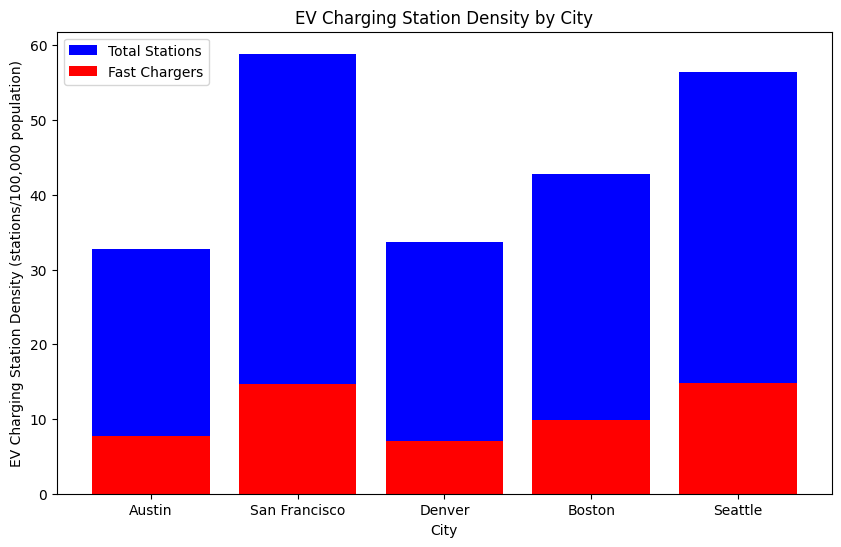

In [ ]:
run_data_analysis_demo(model)



--- Creating a custom visualization based on user request ---

Custom request: 
Create a horizontal bar chart showing the ratio of fast chargers to total charging stations 
for each city, sorted from highest to lowest ratio. Add percentage labels on each bar.


Generated Custom Visualization Code:
```python
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ev_df' is your DataFrame

# Calculate the ratio of fast chargers to total charging stations
ev_df['ratio'] = ev_df['fast_chargers'] / ev_df['station_count']

# Sort the DataFrame by the ratio in descending order
sorted_df = ev_df.sort_values(by='ratio', ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(sorted_df['city'], sorted_df['ratio'], color='skyblue')

# Add labels and percentage values
for i, v in enumerate(sorted_df['ratio']):
    plt.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom')

# Set the title and axis labels
plt.title('Ratio 

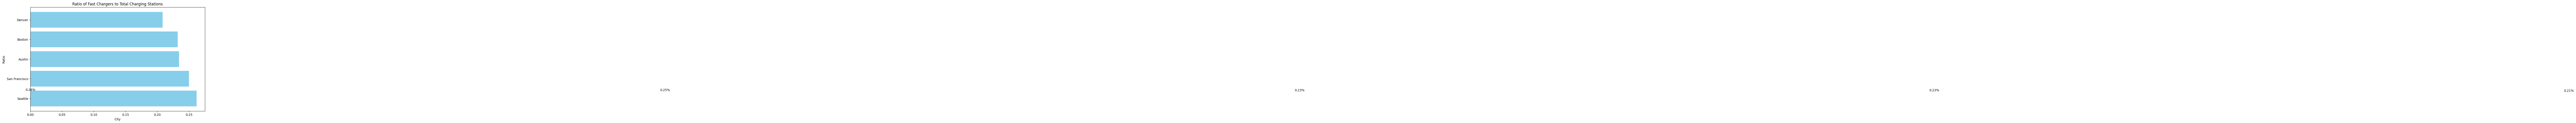

In [ ]:
print("\n\n--- Creating a custom visualization based on user request ---\n")

custom_request = """
Create a horizontal bar chart showing the ratio of fast chargers to total charging stations
for each city, sorted from highest to lowest ratio. Add percentage labels on each bar.
"""

print("Custom request:", custom_request)
custom_viz_code = generate_data_viz_code(ev_data_description, custom_request, model)
print("\nGenerated Custom Visualization Code:")
print("```python")
print(custom_viz_code)
print("```")

print("\nExecuting the custom visualization code:")
success, message = execute_generated_code(custom_viz_code)

# Step 8: Workshop Summary

## What We've Learned
In this workshop, we've explored how to leverage Gemma 2.0 through Vertex AI to build practical AI applications:

1. **Setting up Gemma 2.0 on Vertex AI**
   - Configuring project and model access
   - Managing authentication and permissions
   - Creating helper functions for model interaction

2. **Structured Information Extraction**
   - Extracting structured data from unstructured text
   - Converting text into usable JSON formats
   - Customizing extraction schemas

3. **Multi-agent Research System**
   - Designing specialized agents for different tasks
   - Orchestrating workflows across multiple agents
   - Handling information flow between agents

4. **Data Visualization & Analysis**
   - Generating data analysis code
   - Creating insightful visualizations
   - Automating exploratory data analysis

## Benefits of Vertex AI for Gemma 2.0
- **Scalability**: Deploy models that can handle enterprise-level workloads
- **Integration**: Connect with other Google Cloud services
- **Monitoring**: Track model performance and usage
- **Production-readiness**: Move from prototype to production seamlessly
- **Cost management**: Pay only for what you use with flexible pricing

## Next Steps
1. **Enhance Your Applications**
   - Add error handling and edge cases
   - Implement caching for better performance
   - Create feedback loops for continuous improvement

2. **Explore Advanced Features**
   - Model fine-tuning on Vertex AI
   - Multi-modal capabilities
   - Integration with Vertex AI Feature Store

3. **Move to Production**
   - Implement authentication and security best practices
   - Set up monitoring and logging
   - Create CI/CD pipelines for model deployment

## Resources
- [Vertex AI Documentation](https://cloud.google.com/vertex-ai/docs)
- [Gemma 2.0 on Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/models/gemma)
- [Vertex AI Pipelines](https://cloud.google.com/vertex-ai/docs/pipelines/introduction)
- [Google Cloud AI Solutions](https://cloud.google.com/solutions/ai)

Thanks for participating in this workshop! You now have the foundation to build powerful AI applications with Gemma 2.0 on Vertex AI.

## Hands-on Exercises

Now it's your turn to practice with Gemma 2.0! Try these exercises:

### Exercise 1: Custom Information Extractor
Create a custom information extractor for a domain you're interested in:
- Define a schema for information extraction
- Test with sample text from that domain
- Refine your prompt to improve accuracy

### Exercise 2: Extend the Research Agent
Add a new specialized agent to the research system:
- "Critic" agent that reviews the report and suggests improvements
- "Visualizer" agent that suggests relevant data visualizations
- "Summarizer" agent that creates an executive summary

### Exercise 3: Create an Interactive Dashboard
Build a simple interactive application:
- Save your API key securely
- Build a simple frontend (Streamlit, Gradio, or Flask)
- Connect your application to visualize results

### Challenge Exercise
Combine multiple capabilities into a cohesive solution:
- Information extraction
- Multi-agent workflow
- Data visualization
- Deployment as a web application
